In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression


In [2]:
df1 = pd.read_csv("SeoulBikeData.csv", encoding='unicode_escape')
df1

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [3]:
df1.shape

(8760, 14)

##### There are 8760 Rows and 14 Columns

In [4]:
df1.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### There are 14 column names displayed

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### From above data we infer that there were no null values in data

In [6]:
df1.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [7]:
df1.duplicated().sum()

0

### No duplicate values in data

In [8]:
df1.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [9]:
# Statistical info 
df1.describe(include='all').transpose()

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

# Information & Remarks about Columns

# 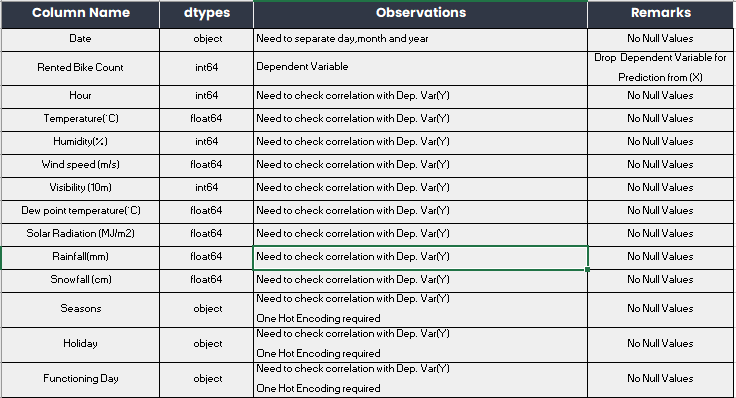

In [10]:
df1.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

# Exploratory Data Analysis

In [11]:
df1["Day"] = pd.to_datetime(df1.Date, format="%d/%m/%Y").dt.day

In [12]:
df1["Month"] = pd.to_datetime(df1.Date, format="%d/%m/%Y").dt.month

In [13]:
df1["Year"] = pd.to_datetime(df1.Date, format="%d/%m/%Y").dt.year

In [14]:
df1.drop(["Date"], axis = 1, inplace = True)
df1

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Day  \
0              0.0            0.0  Winter  No Holiday             Yes    1   
1              0.0            0.0  Winter  No Holiday             Yes    1   
2              0.0            0.0  Winter  No Holiday             Yes    1   
3              0.0            0.0  Winter  No Holiday             Yes    1   
4              0.0            0.0  Winter  No Holiday             Yes    1   
...            ...            ...     ...         ...             ...  ...   
8755           0.0            0.0  Autumn  No Holiday             Yes   30   
8756           0.0            0.0  Autumn  No Holiday             Yes   30   
8757           0.0            0.0  Autumn  No Holiday             Yes   30   
8758           0.0            0.0  Autumn  No Holiday             Yes   30   
8759           0.0            0.0  Autumn  No Holiday             Yes   30   

      Month  Year  
0        12  2017  
1        12  2017  
2        12  2017  
3        12  2017  
4        12  2017  
...     ...   ...  
8755     11  2018  
8756     11  2018  
8757     11  2018  
8758     11  2018  
8759     11  2018  

[8760 rows x 16 columns]

### from original date column we cannot get any insight so i have seperate day, month and year for further analysis

# Hour

In [15]:
df1['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

##### Here in Hour column we can see that time is given in integer value so what i though that whether we can seperate all integer value into bins like, i would seperate time into morning, afternoon, Night so we can do analysis and get desired output from that,

In [16]:
df1['Hour'] = df1['Hour'].replace(list(range(0,13)), 'Morning')
df1['Hour'] = df1['Hour'].replace(list(range(12,19)), 'Afternoon')
df1['Hour'] = df1['Hour'].replace(list(range(18,24)), 'Night')

#### did bining into Morning, Afternoon, Night

Text(0.5, 1.0, 'Hours Vs Rented Bike count')

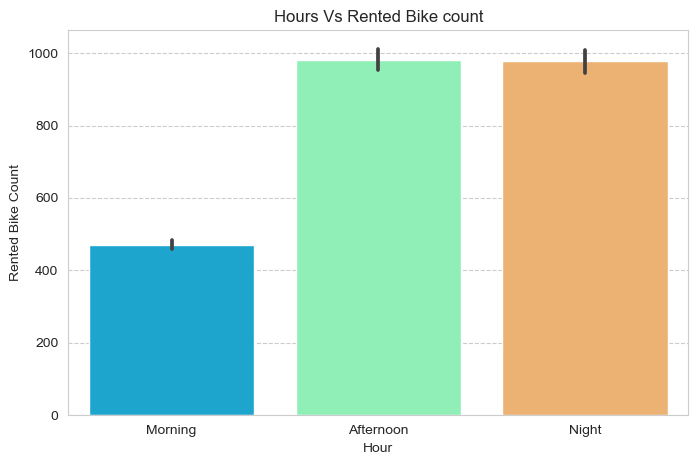

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='Hour',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Hours Vs Rented Bike count")

##### We can infer that, in Afternoon and Night there were more vehicle rented so for our business perspective we could focus more on morning time for increase supply

Text(0.5, 1.0, 'Hours Vs Rented Bike count Vs Seasons')

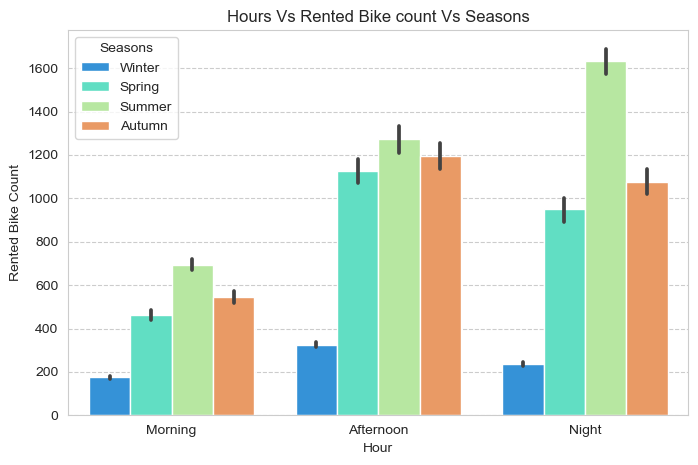

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x='Hour',y='Rented Bike Count',data=df1, palette='rainbow', hue='Seasons')
plt.title("Hours Vs Rented Bike count Vs Seasons")

#### we have analyse previously that which time frame max bike rented but not get clear idea there so for further analysis here we could clearly understand here below points,

#### 1. In Morning bike rent count is more in Summer Season
#### 2. In Afternoon bike rent count is more in Summer Season
#### 3. In Night bike rent count is more in Summer Season

# Temperature(°C)	

Text(0.5, 1.0, 'Whether Temp affect the bike rent count??')

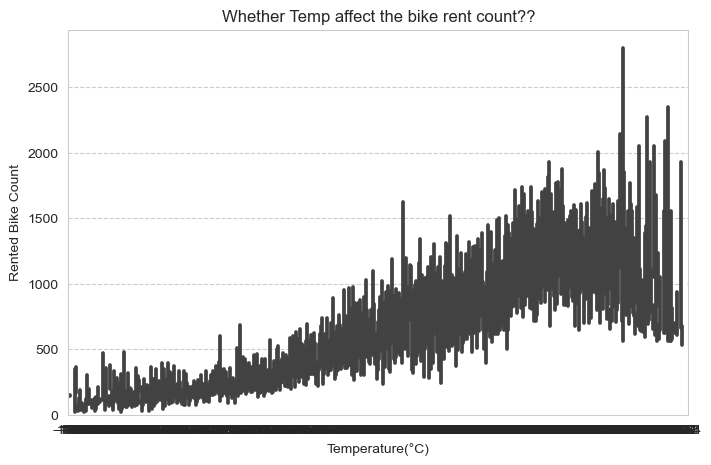

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x='Temperature(°C)',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Whether Temp affect the bike rent count??")

#### As the temperature increases bike rent count increases

# Humidity(%)

Text(0.5, 1.0, 'Whether Humidity affect the bike rent count??')

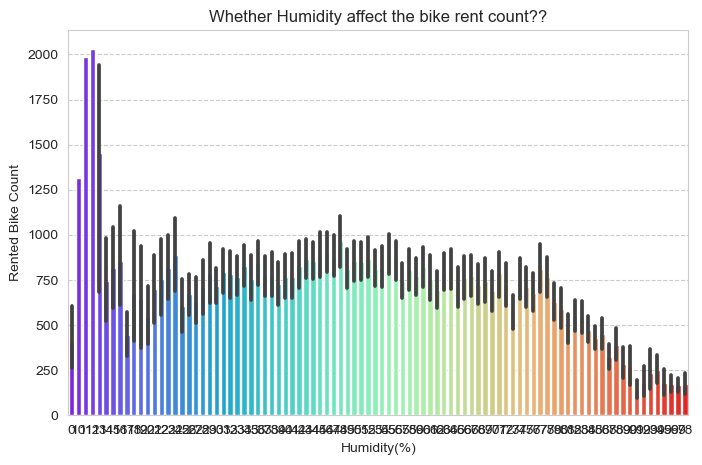

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x='Humidity(%)',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Whether Humidity affect the bike rent count??")

# Wind speed (m/s)

Text(0.5, 1.0, 'Whether Wind speed (m/s) affect the bike rent count??')

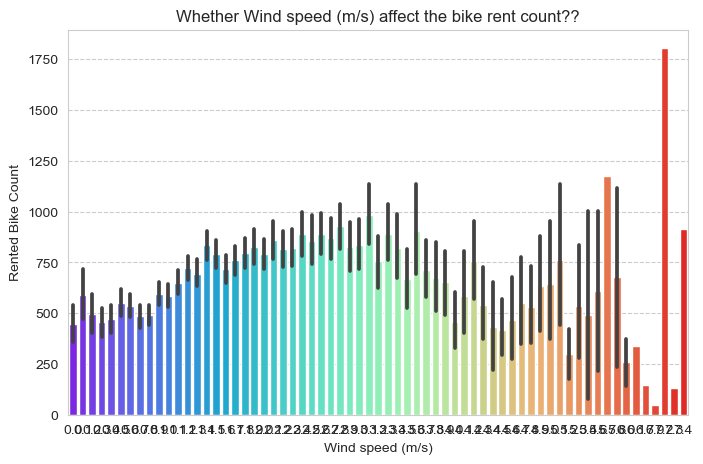

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='Wind speed (m/s)',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Whether Wind speed (m/s) affect the bike rent count??")

# Visibility (10m)

Text(0.5, 1.0, 'Whether Visibility affect the bike rent count??')

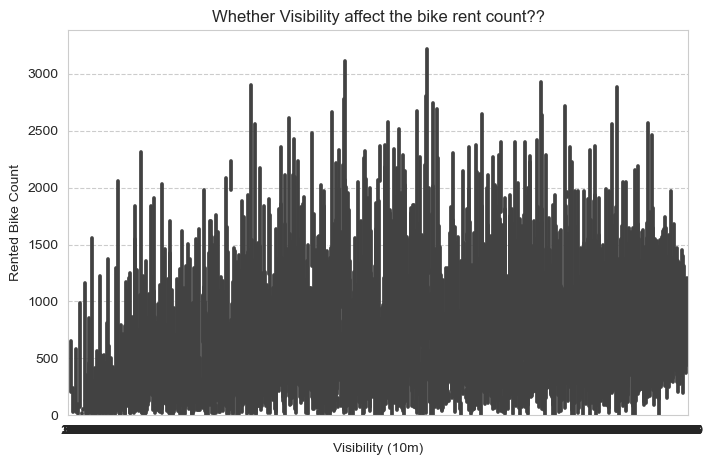

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x='Visibility (10m)',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Whether Visibility affect the bike rent count??")

# Rainfall(mm)

Text(0.5, 1.0, 'Whether Rainfall affect the bike rent count??')

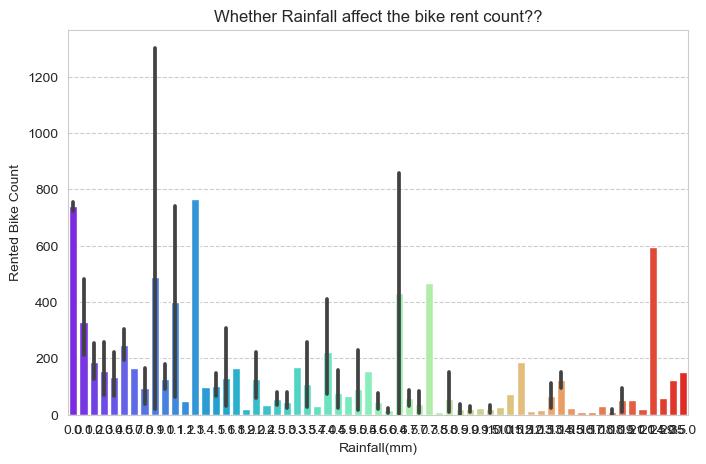

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='Rainfall(mm)',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Whether Rainfall affect the bike rent count??")

# Snowfall (cm)

Text(0.5, 1.0, 'Whether Snowfall affect the bike rent count??')

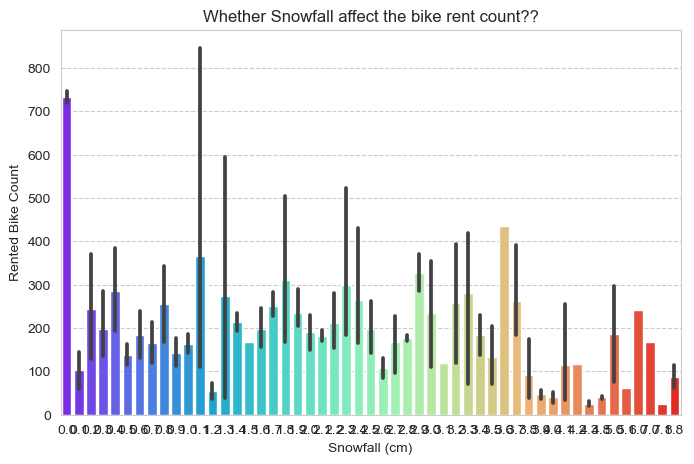

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x='Snowfall (cm)',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Whether Snowfall affect the bike rent count??")

# Seasons

Text(0.5, 1.0, 'Seasons Vs Rented Bike count')

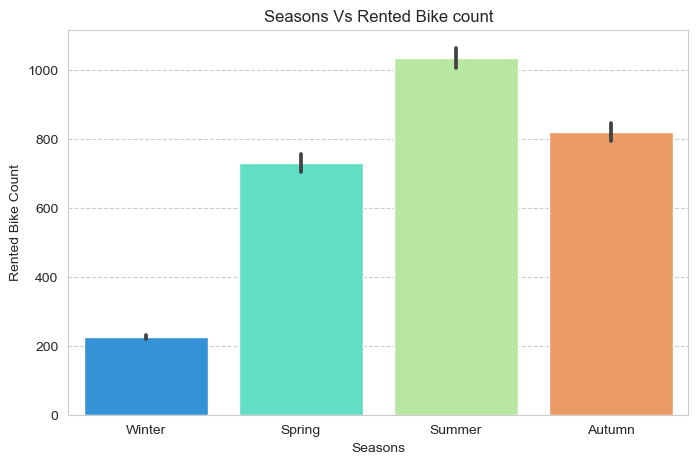

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x='Seasons',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Seasons Vs Rented Bike count")

#### In Summer season bike rent count is more followed by Autumn

# Holidays

Text(0.5, 1.0, 'Holidays Vs Rented Bike count')

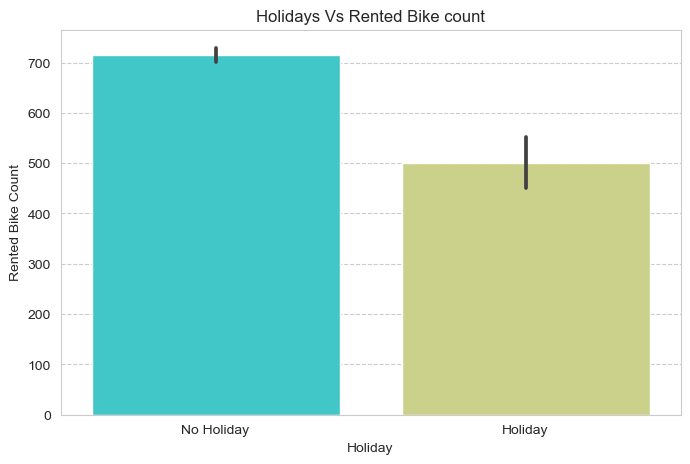

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='Holiday',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Holidays Vs Rented Bike count")

#### Bike Rent count is more when no holiday is there so we can say that people uses bike for transportation to go to offices and other work

<AxesSubplot:xlabel='Hour', ylabel='count'>

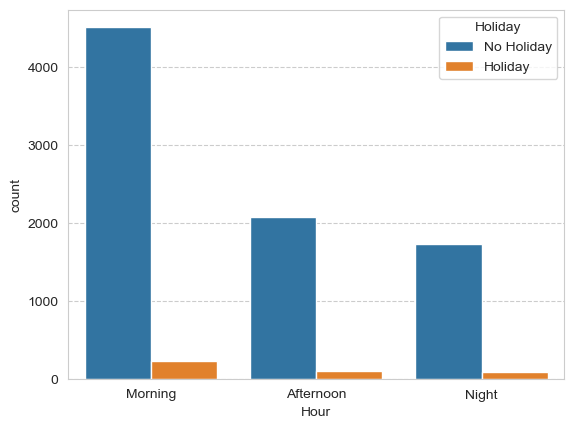

In [27]:
sns.countplot(x='Hour', hue='Holiday', data=df1)

#### during week days people prefer bike more in morning, Afternoon and Night as well

# Year

Text(0.5, 1.0, 'Year Vs Rented Bike count')

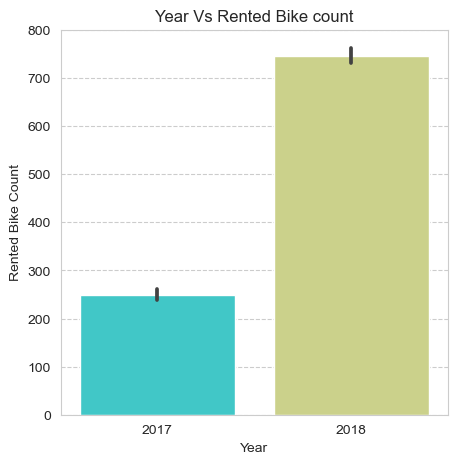

In [28]:
plt.figure(figsize=(5,5))
sns.barplot(x='Year',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Year Vs Rented Bike count")

#### As we seen here that in 2017 bike rent count is less and in 2018 count is increase drastically why because due to starting of services people might not know about this so they uses less but when people start using this service count is gone more in 2018 so we could expect that in upcomming year count will further increase as people will use service more and more

In [29]:
df1['Year'] = df1['Year'].astype(object)

# check the datatype of the column
print(df1.dtypes) 

Rented Bike Count              int64
Hour                          object
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
Day                            int64
Month                          int64
Year                          object
dtype: object


In [30]:
df1

Rented Bike Count     Hour  Temperature(°C)  Humidity(%)  \
0                   254  Morning             -5.2           37   
1                   204  Morning             -5.5           38   
2                   173  Morning             -6.0           39   
3                   107  Morning             -6.2           40   
4                    78  Morning             -6.0           36   
...                 ...      ...              ...          ...   
8755               1003    Night              4.2           34   
8756                764    Night              3.4           37   
8757                694    Night              2.6           39   
8758                712    Night              2.1           41   
8759                584    Night              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  Day  Month  Year  
0     No Holiday             Yes    1     12  2017  
1     No Holiday             Yes    1     12  2017  
2     No Holiday             Yes    1     12  2017  
3     No Holiday             Yes    1     12  2017  
4     No Holiday             Yes    1     12  2017  
...          ...             ...  ...    ...   ...  
8755  No Holiday             Yes   30     11  2018  
8756  No Holiday             Yes   30     11  2018  
8757  No Holiday             Yes   30     11  2018  
8758  No Holiday             Yes   30     11  2018  
8759  No Holiday             Yes   30     11  2018  

[8760 rows x 16 columns]

In [31]:
df1['Year']=df1['Year'].replace( 2017, 0)
df1['Year']=df1['Year'].replace( 2018, 1)

In [32]:
df1

Rented Bike Count     Hour  Temperature(°C)  Humidity(%)  \
0                   254  Morning             -5.2           37   
1                   204  Morning             -5.5           38   
2                   173  Morning             -6.0           39   
3                   107  Morning             -6.2           40   
4                    78  Morning             -6.0           36   
...                 ...      ...              ...          ...   
8755               1003    Night              4.2           34   
8756                764    Night              3.4           37   
8757                694    Night              2.6           39   
8758                712    Night              2.1           41   
8759                584    Night              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  Day  Month  Year  
0     No Holiday             Yes    1     12     0  
1     No Holiday             Yes    1     12     0  
2     No Holiday             Yes    1     12     0  
3     No Holiday             Yes    1     12     0  
4     No Holiday             Yes    1     12     0  
...          ...             ...  ...    ...   ...  
8755  No Holiday             Yes   30     11     1  
8756  No Holiday             Yes   30     11     1  
8757  No Holiday             Yes   30     11     1  
8758  No Holiday             Yes   30     11     1  
8759  No Holiday             Yes   30     11     1  

[8760 rows x 16 columns]

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

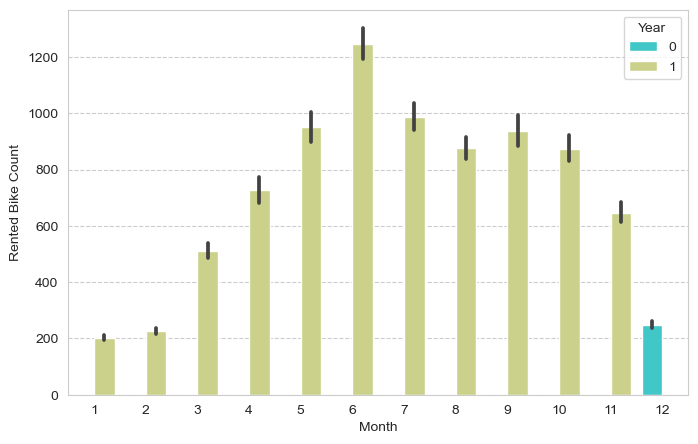

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='Month',y='Rented Bike Count',data=df1, palette='rainbow', hue='Year')

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

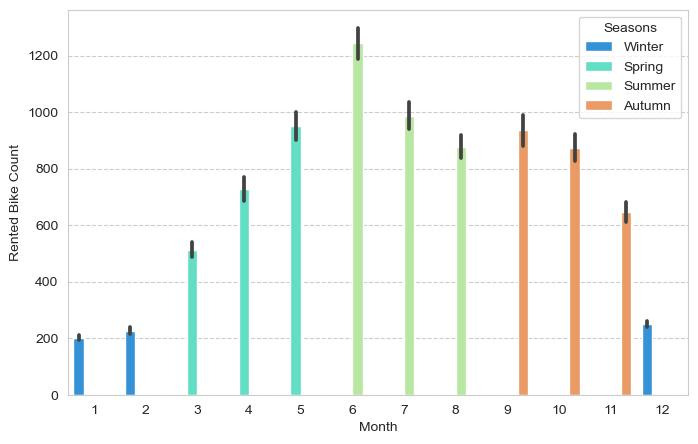

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='Month',y='Rented Bike Count',data=df1, palette='rainbow', hue='Seasons')

#### Here we clearly seen that from first month count is increasing in everymonth till summer and after that count is further start decilining it may be because of rainy season people prefer less bike rent services

# Month

In [35]:
df1['Month'] = df1['Month'].astype(object)

In [36]:
df1['Month']=df1['Month'].replace(1, 'January')
df1['Month']=df1['Month'].replace(2, 'February')
df1['Month']=df1['Month'].replace(3, 'March')
df1['Month']=df1['Month'].replace(4, 'April')
df1['Month']=df1['Month'].replace(5, 'May')
df1['Month']=df1['Month'].replace(6, 'Jun')
df1['Month']=df1['Month'].replace(7, 'July')
df1['Month']=df1['Month'].replace(8, 'August')
df1['Month']=df1['Month'].replace(9, 'September')
df1['Month']=df1['Month'].replace(10, 'October')
df1['Month']=df1['Month'].replace(11, 'November')
df1['Month']=df1['Month'].replace(12, 'December')

In [37]:
df1

Rented Bike Count     Hour  Temperature(°C)  Humidity(%)  \
0                   254  Morning             -5.2           37   
1                   204  Morning             -5.5           38   
2                   173  Morning             -6.0           39   
3                   107  Morning             -6.2           40   
4                    78  Morning             -6.0           36   
...                 ...      ...              ...          ...   
8755               1003    Night              4.2           34   
8756                764    Night              3.4           37   
8757                694    Night              2.6           39   
8758                712    Night              2.1           41   
8759                584    Night              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  Day     Month  Year  
0     No Holiday             Yes    1  December     0  
1     No Holiday             Yes    1  December     0  
2     No Holiday             Yes    1  December     0  
3     No Holiday             Yes    1  December     0  
4     No Holiday             Yes    1  December     0  
...          ...             ...  ...       ...   ...  
8755  No Holiday             Yes   30  November     1  
8756  No Holiday             Yes   30  November     1  
8757  No Holiday             Yes   30  November     1  
8758  No Holiday             Yes   30  November     1  
8759  No Holiday             Yes   30  November     1  

[8760 rows x 16 columns]

#### Here we have encoded month column and convert it into object dtype and after that we will convert month column into one hot encoding.

# Pair Plot for all features

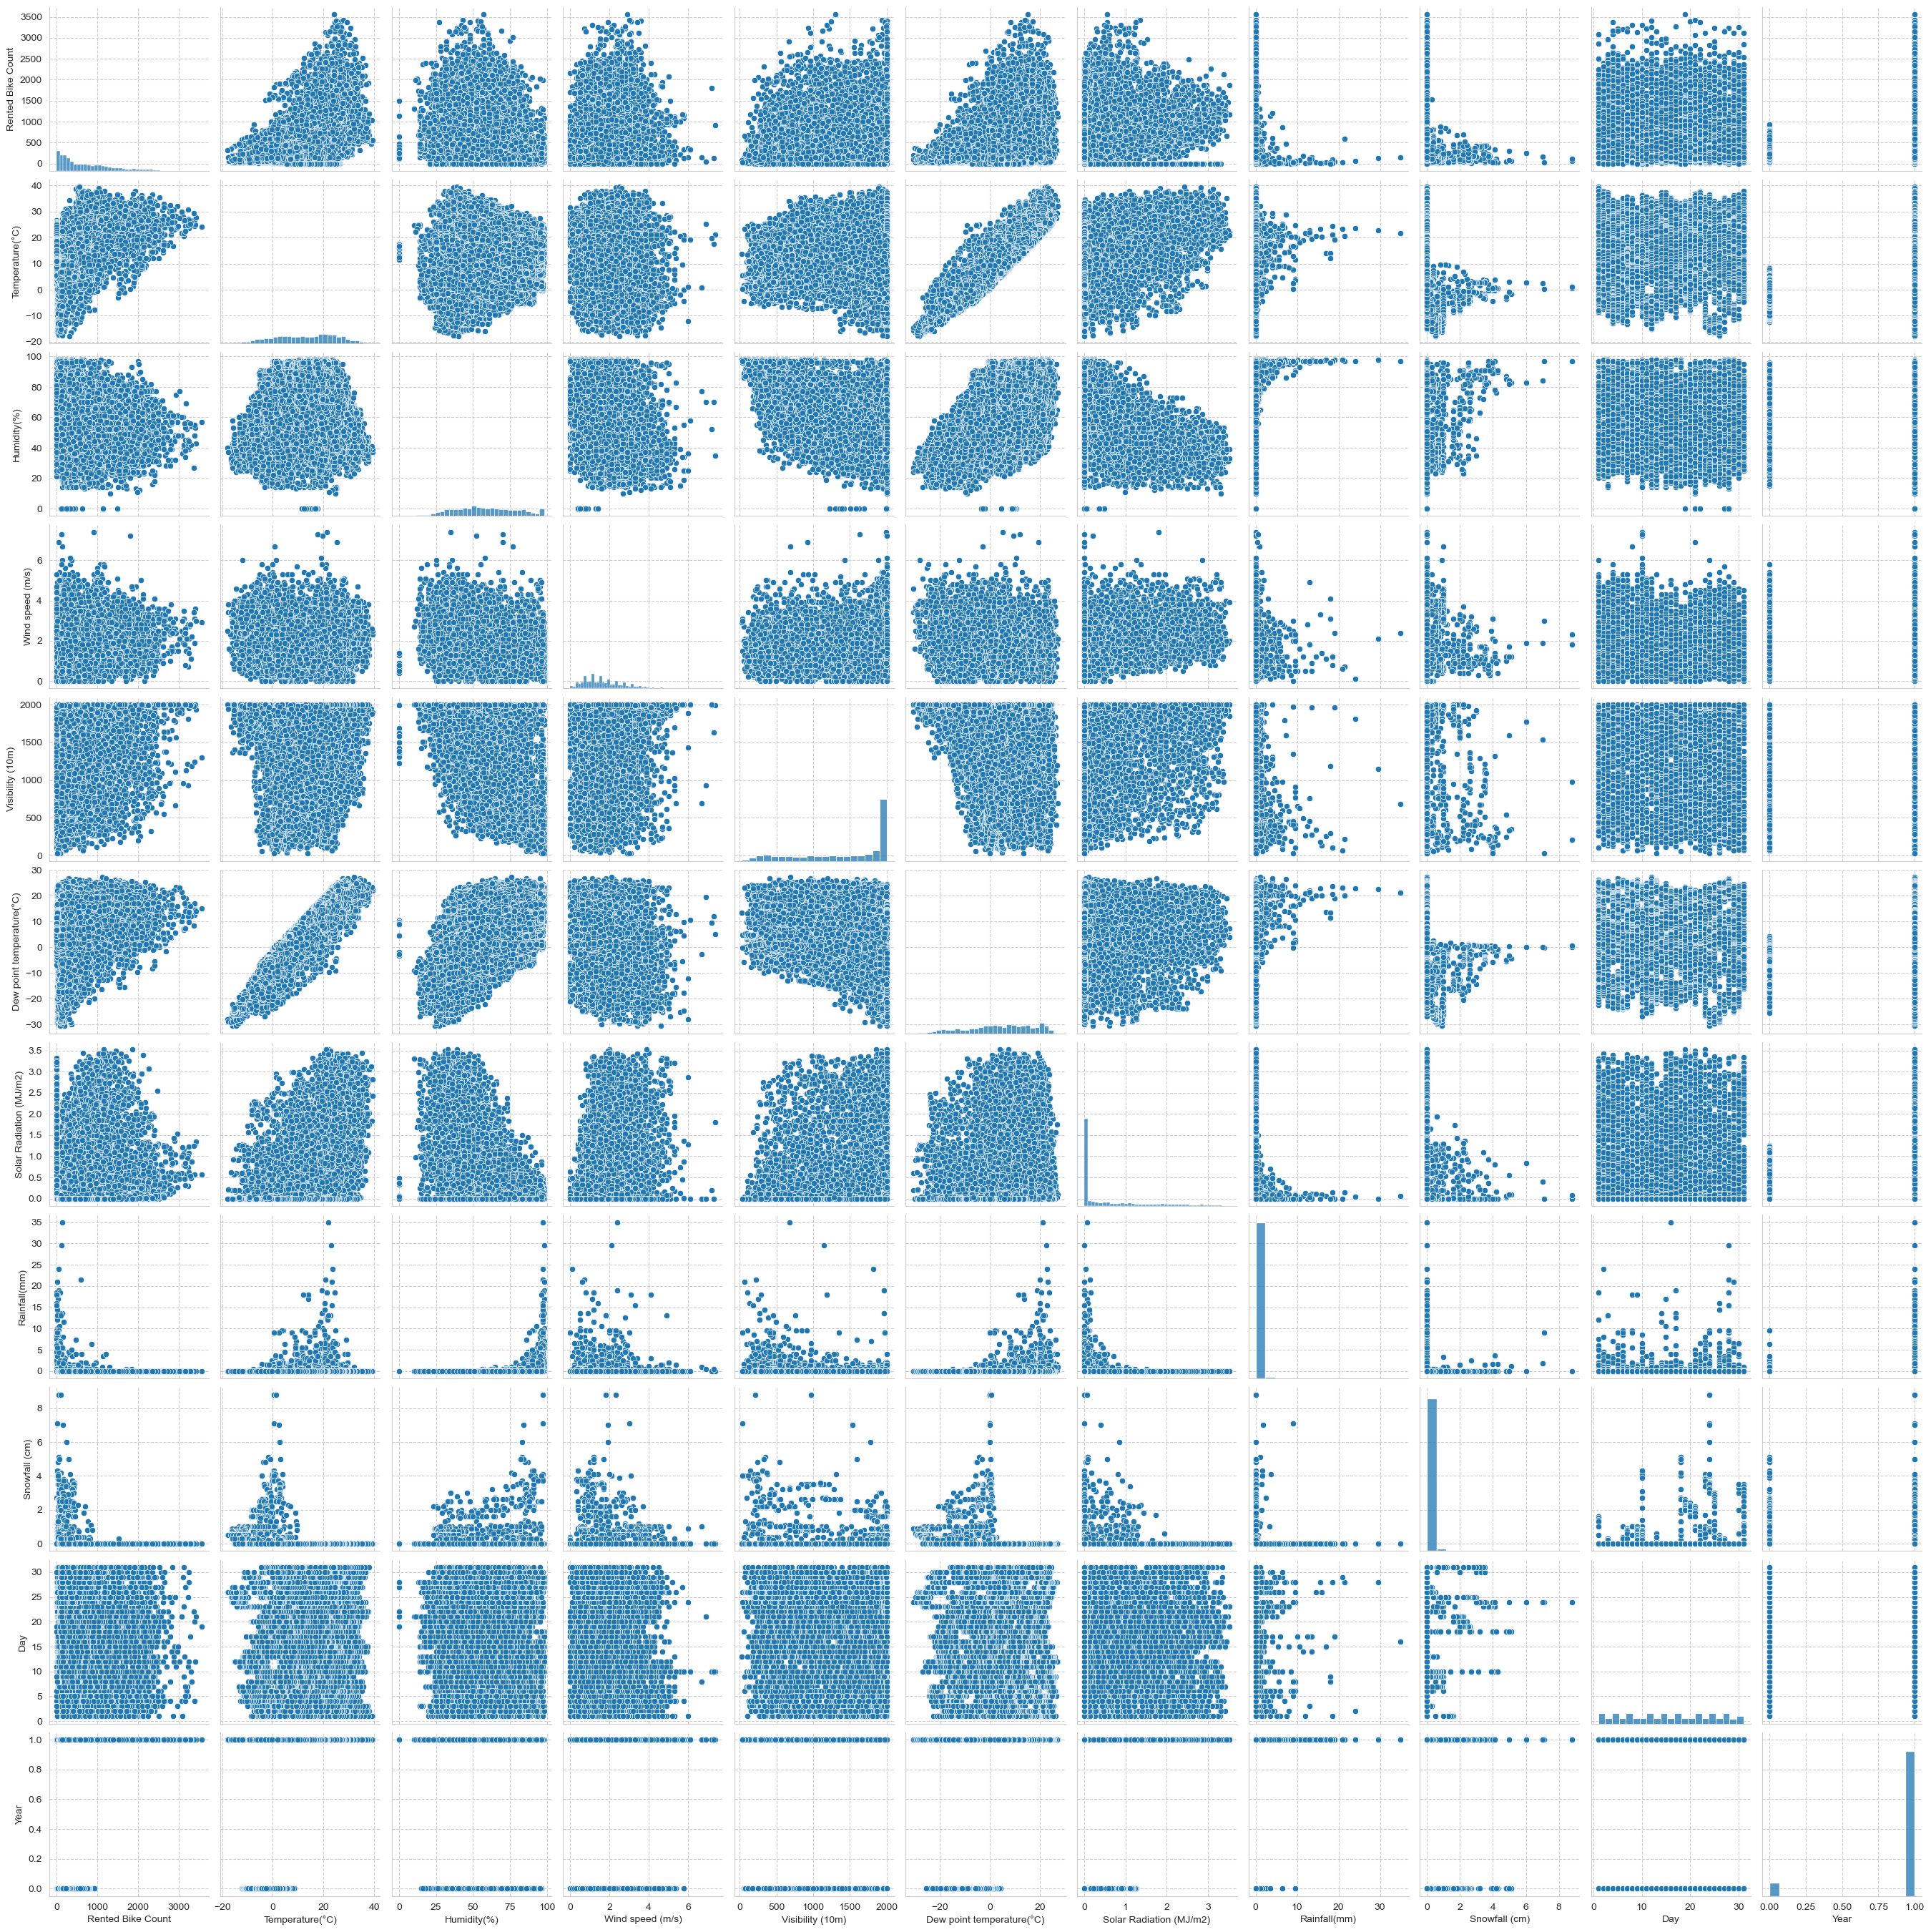

In [38]:
sns.pairplot(df1)
plt.show()

# Seperating Categorical and Numerical Variable

In [39]:
# get all the categorical columns name
cat_cols = list(df1.select_dtypes(include='object').columns)
print(f'Categorical columns: {cat_cols}')

Categorical columns: ['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Month']


In [40]:
# get all the continuous columns name
num_col = list(df1.select_dtypes(exclude='object').columns)
print(f'Numerical Columns: {num_col}')

Numerical Columns: ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day', 'Year']


In [41]:
categorical_columns=df1[cat_cols].copy()
categorical_columns

Hour Seasons     Holiday Functioning Day     Month
0     Morning  Winter  No Holiday             Yes  December
1     Morning  Winter  No Holiday             Yes  December
2     Morning  Winter  No Holiday             Yes  December
3     Morning  Winter  No Holiday             Yes  December
4     Morning  Winter  No Holiday             Yes  December
...       ...     ...         ...             ...       ...
8755    Night  Autumn  No Holiday             Yes  November
8756    Night  Autumn  No Holiday             Yes  November
8757    Night  Autumn  No Holiday             Yes  November
8758    Night  Autumn  No Holiday             Yes  November
8759    Night  Autumn  No Holiday             Yes  November

[8760 rows x 5 columns]

In [42]:
numerical=df1[num_col].copy()
numerical

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254             -5.2           37               2.2   
1                   204             -5.5           38               0.8   
2                   173             -6.0           39               1.0   
3                   107             -6.2           40               0.9   
4                    78             -6.0           36               2.3   
...                 ...              ...          ...               ...   
8755               1003              4.2           34               2.6   
8756                764              3.4           37               2.3   
8757                694              2.6           39               0.3   
8758                712              2.1           41               1.0   
8759                584              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  Day  Year  
0              0.0            0.0    1     0  
1              0.0            0.0    1     0  
2              0.0            0.0    1     0  
3              0.0            0.0    1     0  
4              0.0            0.0    1     0  
...            ...            ...  ...   ...  
8755           0.0            0.0   30     1  
8756           0.0            0.0   30     1  
8757           0.0            0.0   30     1  
8758           0.0            0.0   30     1  
8759           0.0            0.0   30     1  

[8760 rows x 11 columns]

# Checking Outliers from Box Plot

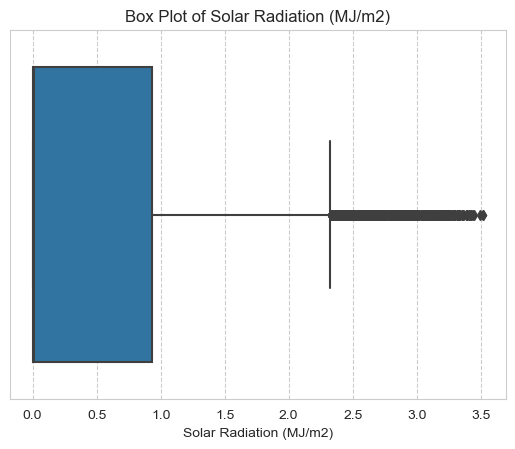

In [43]:
sns.boxplot(x=df1["Solar Radiation (MJ/m2)"])

# Add title and labels
plt.title("Box Plot of Solar Radiation (MJ/m2)")
plt.xlabel("Solar Radiation (MJ/m2)")

# Show plot
plt.show()

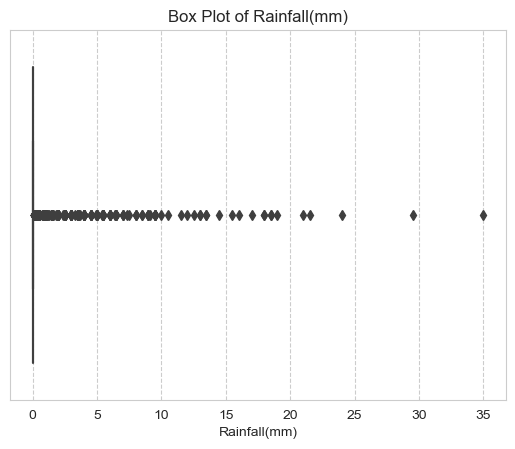

In [44]:
sns.boxplot(x=df1["Rainfall(mm)"])

# Add title and labels
plt.title("Box Plot of Rainfall(mm)")
plt.xlabel("Rainfall(mm)")

# Show plot
plt.show()

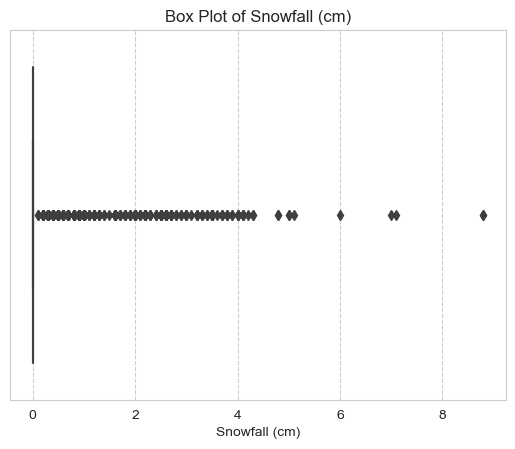

In [45]:
sns.boxplot(x=df1["Snowfall (cm)"])

# Add title and labels
plt.title("Box Plot of Snowfall (cm)")
plt.xlabel("Snowfall (cm)")

# Show plot
plt.show()

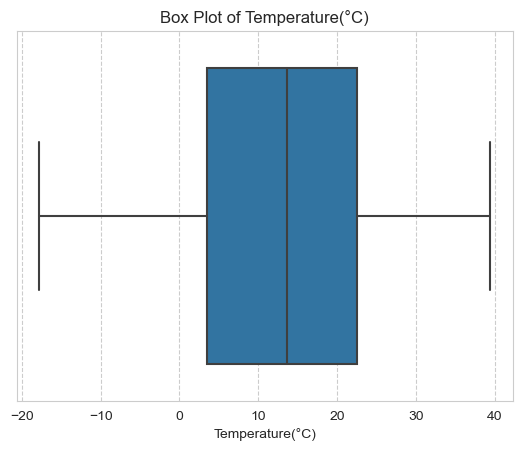

In [46]:
sns.boxplot(x=df1["Temperature(°C)"])

# Add title and labels
plt.title("Box Plot of Temperature(°C)")
plt.xlabel("Temperature(°C)")

# Show plot
plt.show()

# Checking Skewness using Distribution Plot

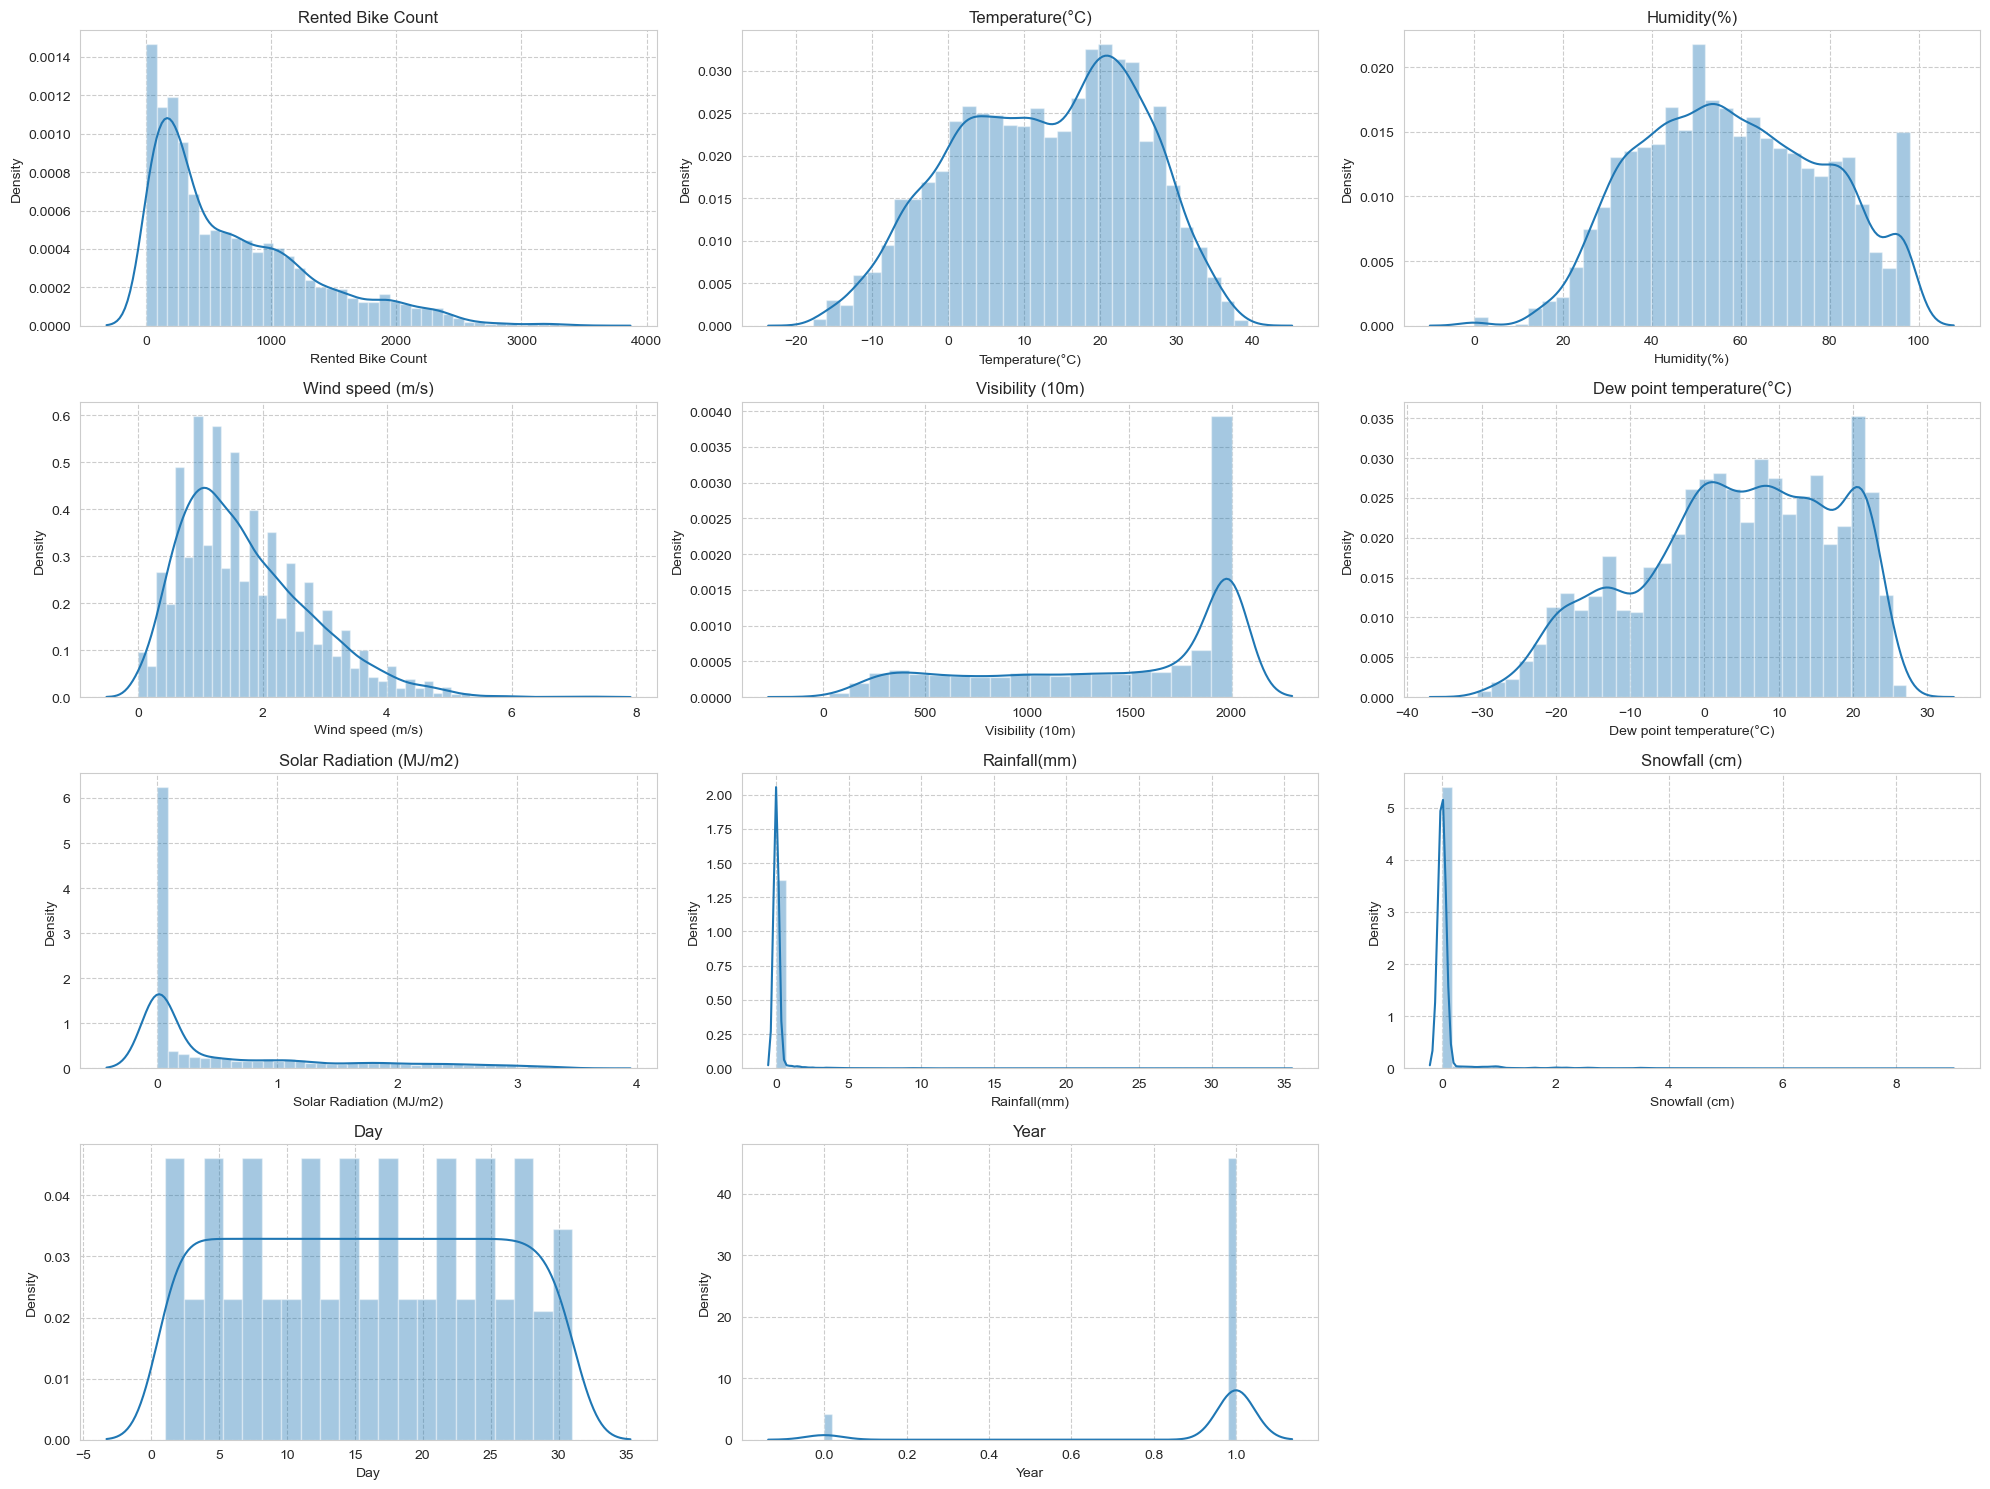

In [47]:
n=1
plt.figure(figsize=(20,15))
for i in numerical.columns:
  plt.subplot(4,3,n)
  n=n+1
  sns.distplot(df1[i])
  plt.title(i)
  plt.tight_layout()

# Right skewed columns are

Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

# Left skewed columns are

Visibility (10m), Dew point temperature(°C), Temperature(°C),Year

# Checking plot between Mean and Median 

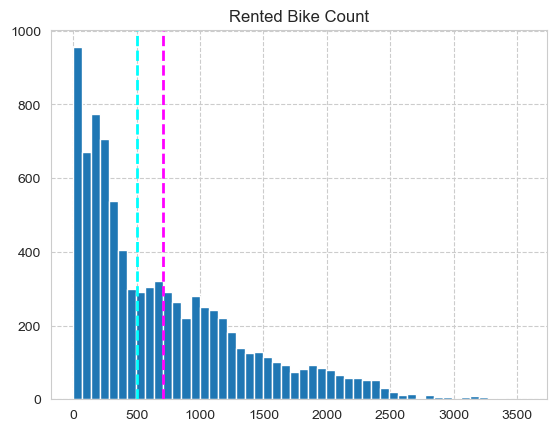

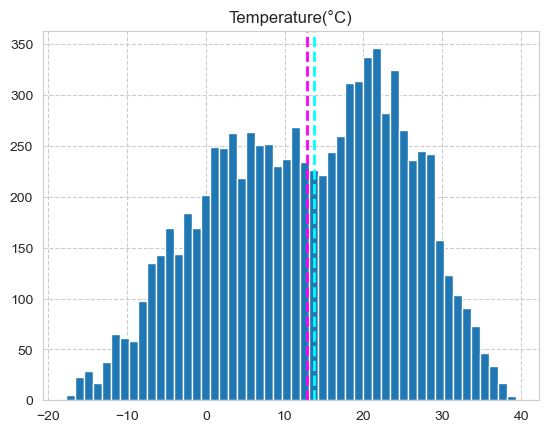

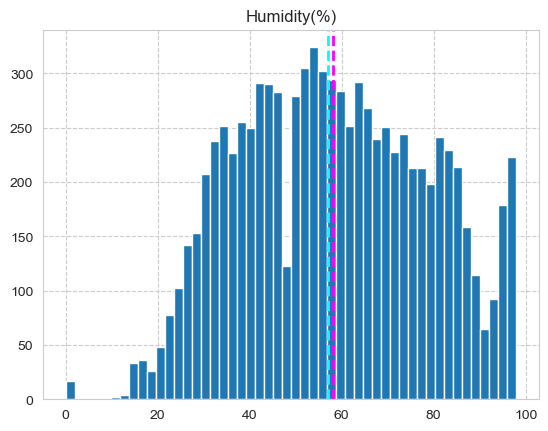

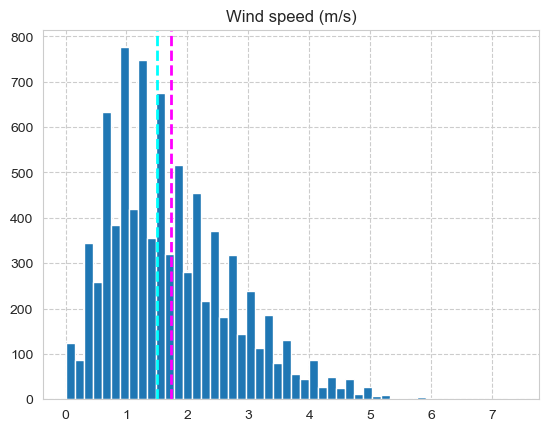

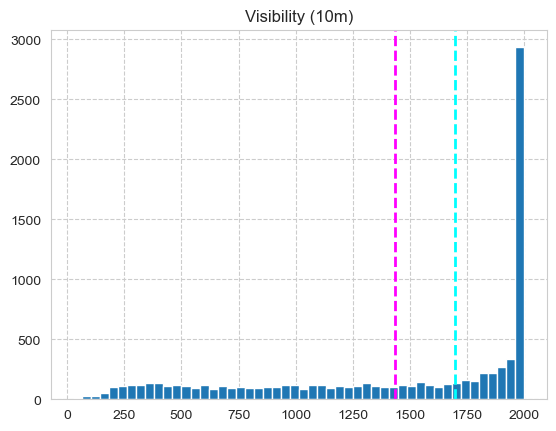

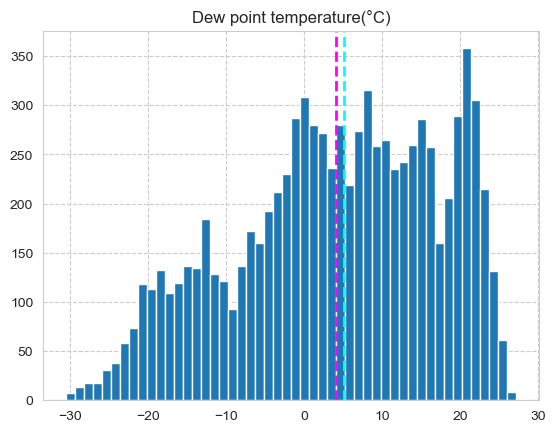

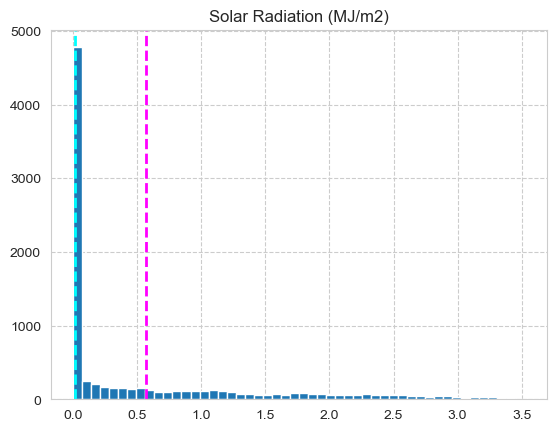

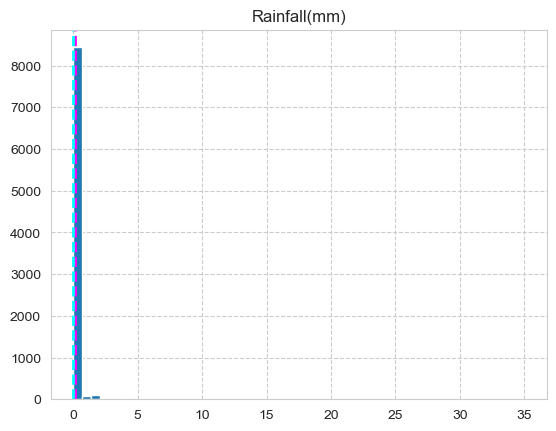

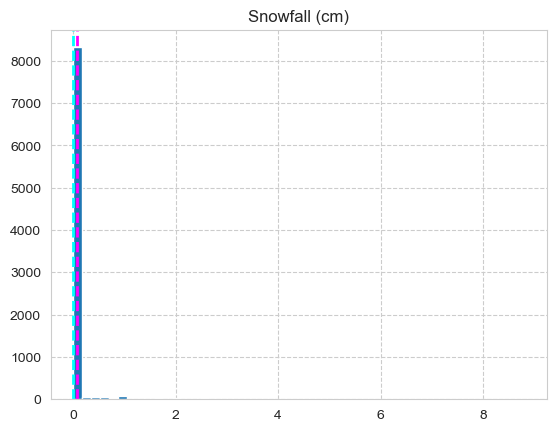

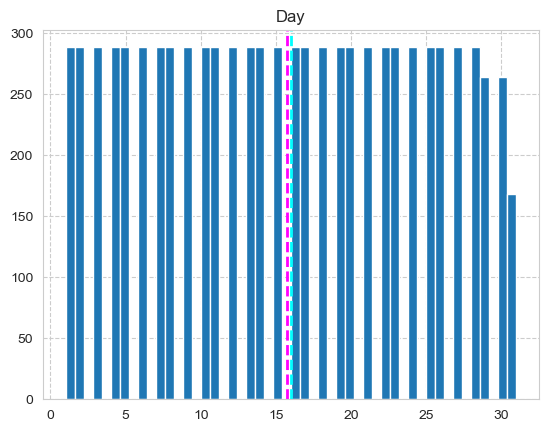

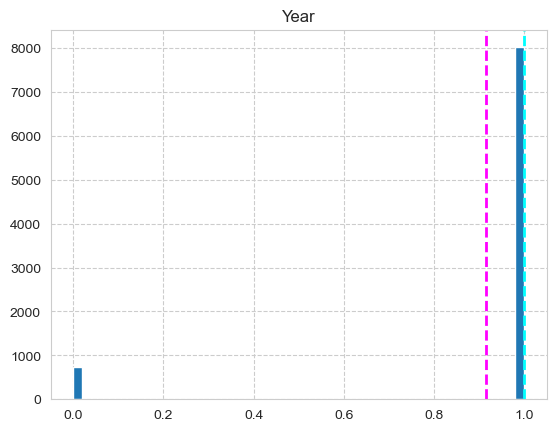

In [48]:
for col in numerical[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=df1[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)

#### From this we are coming to know that the features which are skewed, their mean and the median are also skewed, which was understood by looking at the graph that this would happen.

# Relation of numerical features with our dependent variable

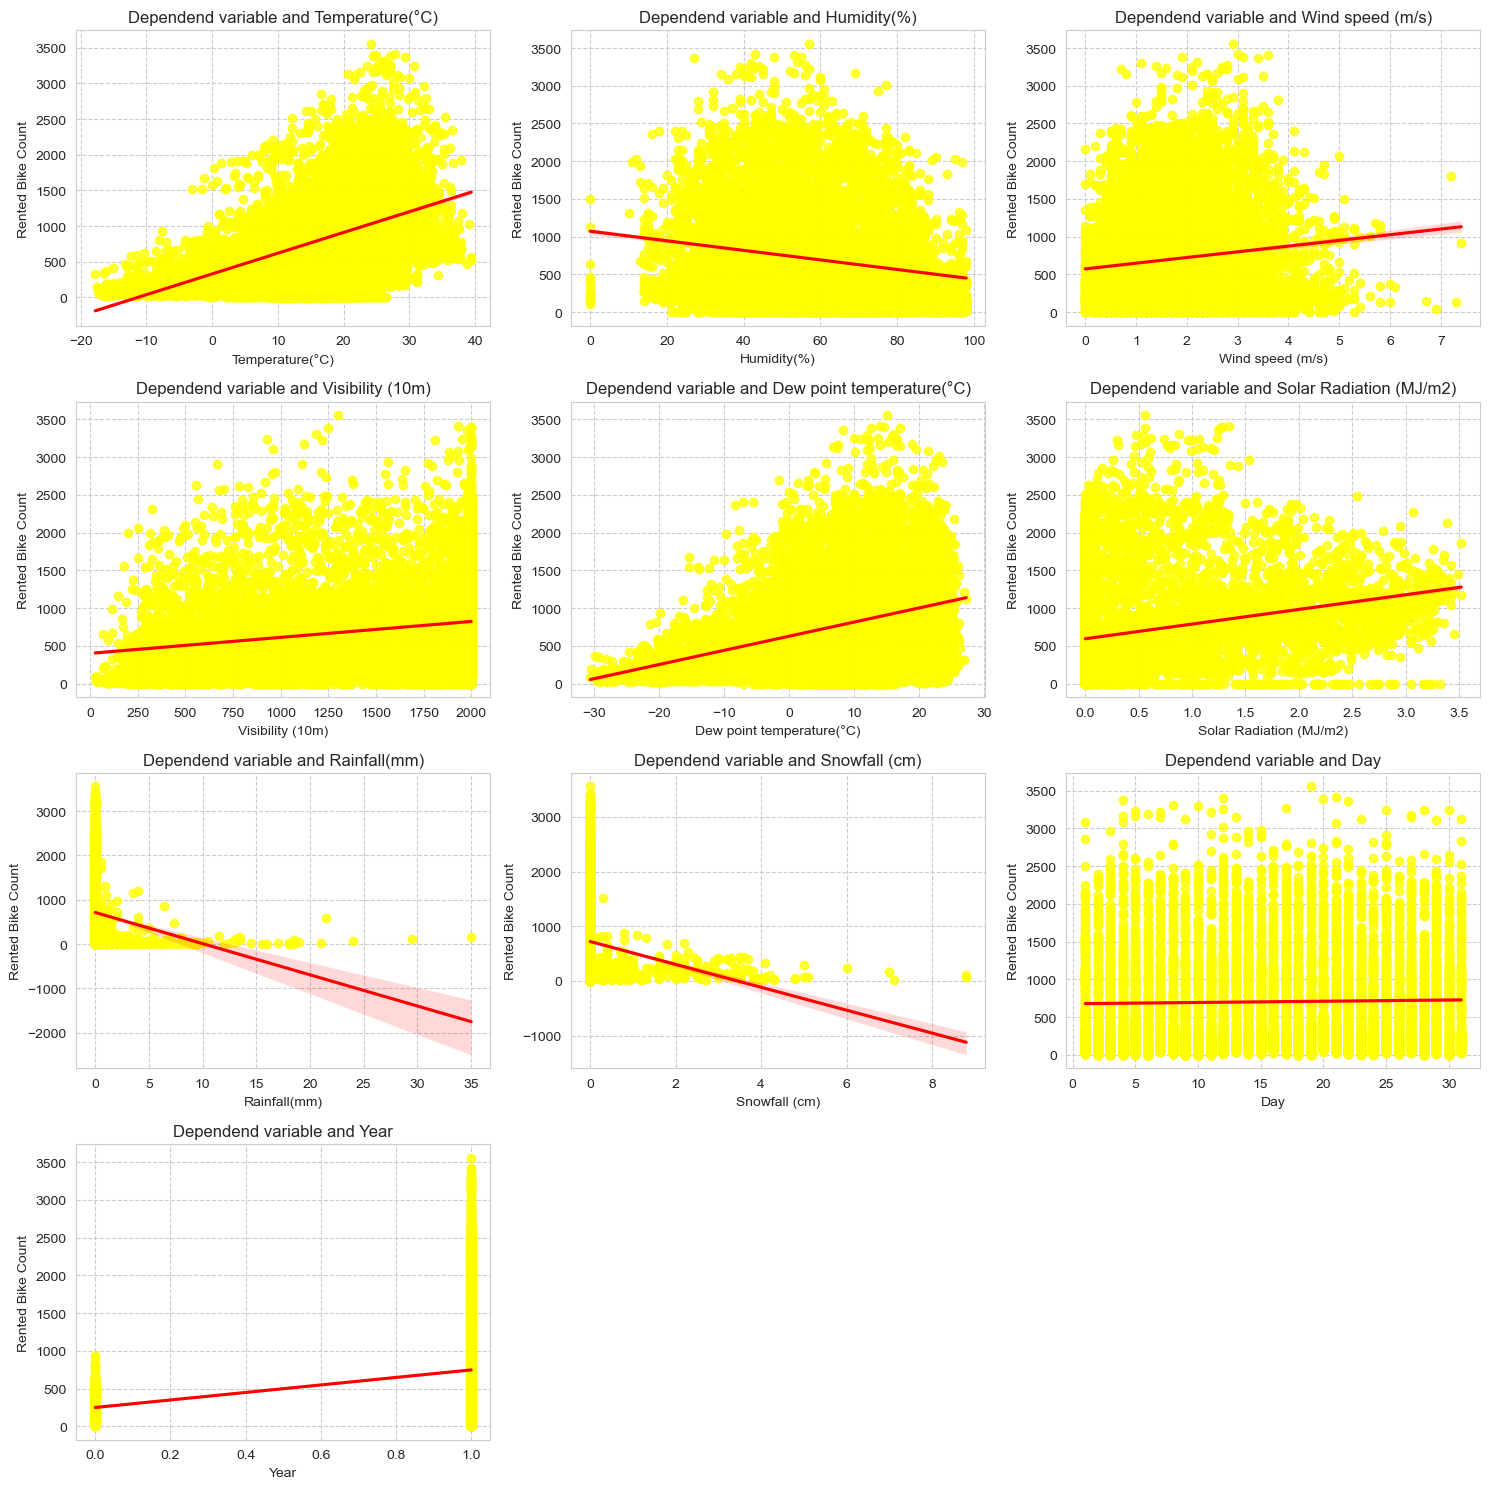

In [49]:
n=1
plt.figure(figsize=(15,15))
for i in numerical.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,3,n)
    n+=1
    sns.regplot(df1[i], df1['Rented Bike Count'],scatter_kws={"color": "yellow"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

#### This regression plots shows that some of our features are positive linear and some are negative linear in relation to our target variable.

## Now is the time to know what is the correlation of our dependent variable with the independent features

In [50]:
df1.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Day                          0.022291
Year                         0.215162
Name: Rented Bike Count, dtype: float64

#### As we saw in the regression plot that some features are negatively correlated and some positive, we are seeing the same thing here as well.

# Checking Multicilinearity from Heat Map 

<AxesSubplot:>

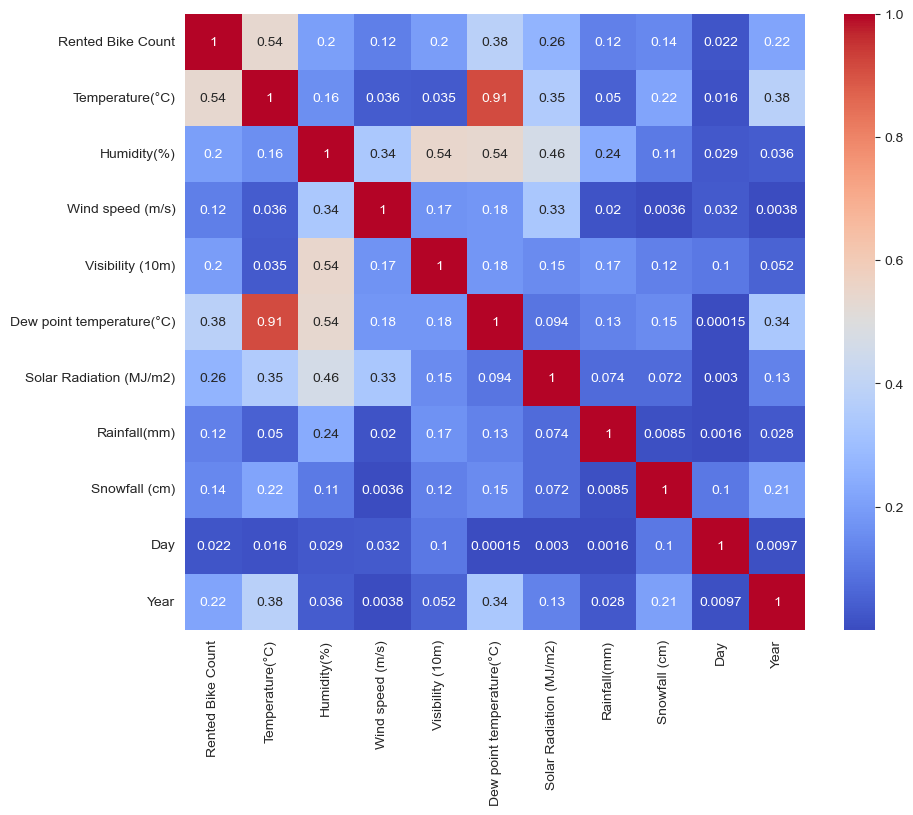

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(abs(df1.corr()), cmap='coolwarm', annot=True)

#### From this graph we are able to see that there is multicollinearity in temperature(°C) and dew point temperature(°C) column so i will drop dew point temperature to handle multicolinearity

In [52]:
df1

Rented Bike Count     Hour  Temperature(°C)  Humidity(%)  \
0                   254  Morning             -5.2           37   
1                   204  Morning             -5.5           38   
2                   173  Morning             -6.0           39   
3                   107  Morning             -6.2           40   
4                    78  Morning             -6.0           36   
...                 ...      ...              ...          ...   
8755               1003    Night              4.2           34   
8756                764    Night              3.4           37   
8757                694    Night              2.6           39   
8758                712    Night              2.1           41   
8759                584    Night              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  Day     Month  Year  
0     No Holiday             Yes    1  December     0  
1     No Holiday             Yes    1  December     0  
2     No Holiday             Yes    1  December     0  
3     No Holiday             Yes    1  December     0  
4     No Holiday             Yes    1  December     0  
...          ...             ...  ...       ...   ...  
8755  No Holiday             Yes   30  November     1  
8756  No Holiday             Yes   30  November     1  
8757  No Holiday             Yes   30  November     1  
8758  No Holiday             Yes   30  November     1  
8759  No Holiday             Yes   30  November     1  

[8760 rows x 16 columns]

# Feature Selection using VIF Technique

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [54]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables        VIF
0          Temperature(°C)   3.286952
1              Humidity(%)   8.198857
2         Wind speed (m/s)   4.184472
3         Visibility (10m)   5.623963
4  Solar Radiation (MJ/m2)   2.329587
5             Rainfall(mm)   1.079605
6            Snowfall (cm)   1.155265
7                      Day   3.809548
8                     Year  11.975862

In [55]:
df1.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [56]:
df1.head(2)

Rented Bike Count     Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254  Morning             -5.2           37               2.2   
1                204  Morning             -5.5           38               0.8   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   

  Seasons     Holiday Functioning Day  Day     Month  Year  
0  Winter  No Holiday             Yes    1  December     0  
1  Winter  No Holiday             Yes    1  December     0

<AxesSubplot:>

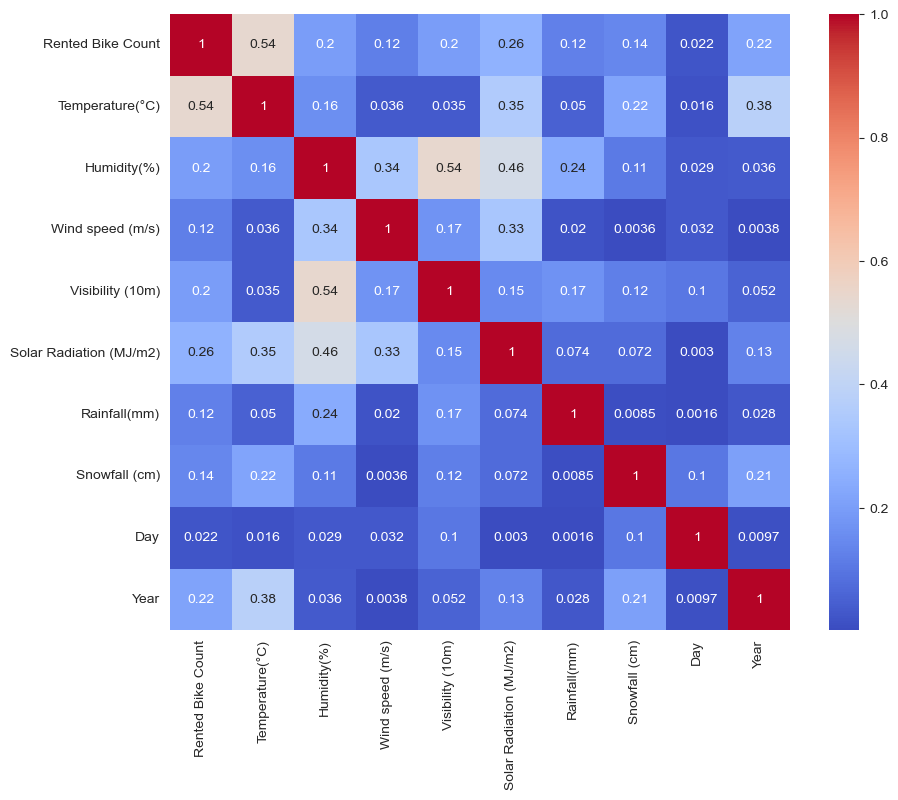

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(abs(df1.corr()), cmap='coolwarm', annot=True)

#### We have drop Dew point Temperature above and checked heat map

In [58]:
df1['Temperature(°C)'] = df1['Temperature(°C)'].astype(np.float32)
df1['Wind speed (m/s)'] = df1['Wind speed (m/s)'].astype(np.float32)
df1['Solar Radiation (MJ/m2)'] = df1['Solar Radiation (MJ/m2)'].astype(np.float32)
df1['Rainfall(mm)'] = df1['Rainfall(mm)'].astype(np.float32)
df1['Snowfall (cm)'] = df1['Snowfall (cm)'].astype(np.float32)

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   object 
 2   Temperature(°C)          8760 non-null   float32
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float32
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float32
 7   Rainfall(mm)             8760 non-null   float32
 8   Snowfall (cm)            8760 non-null   float32
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Day                      8760 non-null   int64  
 13  Month                    8760 non-null   object 
 14  Year                    

# One Hot Encoding to our final dataset for Modeling

In [60]:
final_df_for_model=pd.get_dummies(df1,drop_first=True,sparse=True)

In [61]:
final_df_for_model.head(5)

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Day  Year  ...  Month_December  Month_February  Month_January  Month_July  \
0    1     0  ...               1               0              0           0   
1    1     0  ...               1               0              0           0   
2    1     0  ...               1               0              0           0   
3    1     0  ...               1               0              0           0   
4    1     0  ...               1               0              0           0   

   Month_Jun  Month_March  Month_May  Month_November  Month_October  \
0          0            0          0               0              0   
1          0            0          0               0              0   
2          0            0          0               0              0   
3          0            0          0               0              0   
4          0            0          0               0              0   

   Month_September  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 28 columns]

In [62]:
final_df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype           
---  ------                   --------------  -----           
 0   Rented Bike Count        8760 non-null   int64           
 1   Temperature(°C)          8760 non-null   float32         
 2   Humidity(%)              8760 non-null   int64           
 3   Wind speed (m/s)         8760 non-null   float32         
 4   Visibility (10m)         8760 non-null   int64           
 5   Solar Radiation (MJ/m2)  8760 non-null   float32         
 6   Rainfall(mm)             8760 non-null   float32         
 7   Snowfall (cm)            8760 non-null   float32         
 8   Day                      8760 non-null   int64           
 9   Year                     8760 non-null   int64           
 10  Hour_Morning             8760 non-null   Sparse[uint8, 0]
 11  Hour_Night               8760 non-null   Sparse[uint8, 0]
 12  Season

In [63]:
final_df_for_model['Temperature(°C)'] = final_df_for_model['Temperature(°C)'].astype(np.float32)
final_df_for_model['Wind speed (m/s)'] = final_df_for_model['Wind speed (m/s)'].astype(np.float32)
final_df_for_model['Solar Radiation (MJ/m2)'] = final_df_for_model['Solar Radiation (MJ/m2)'].astype(np.float32)
final_df_for_model['Rainfall(mm)'] = final_df_for_model['Rainfall(mm)'].astype(np.float32)
final_df_for_model['Snowfall (cm)'] = final_df_for_model['Snowfall (cm)'].astype(np.float32)

# Checking Distribution of data for Dependent Variable i.e (Rented Bike Count)

Text(0.5, 1.0, 'Square root')

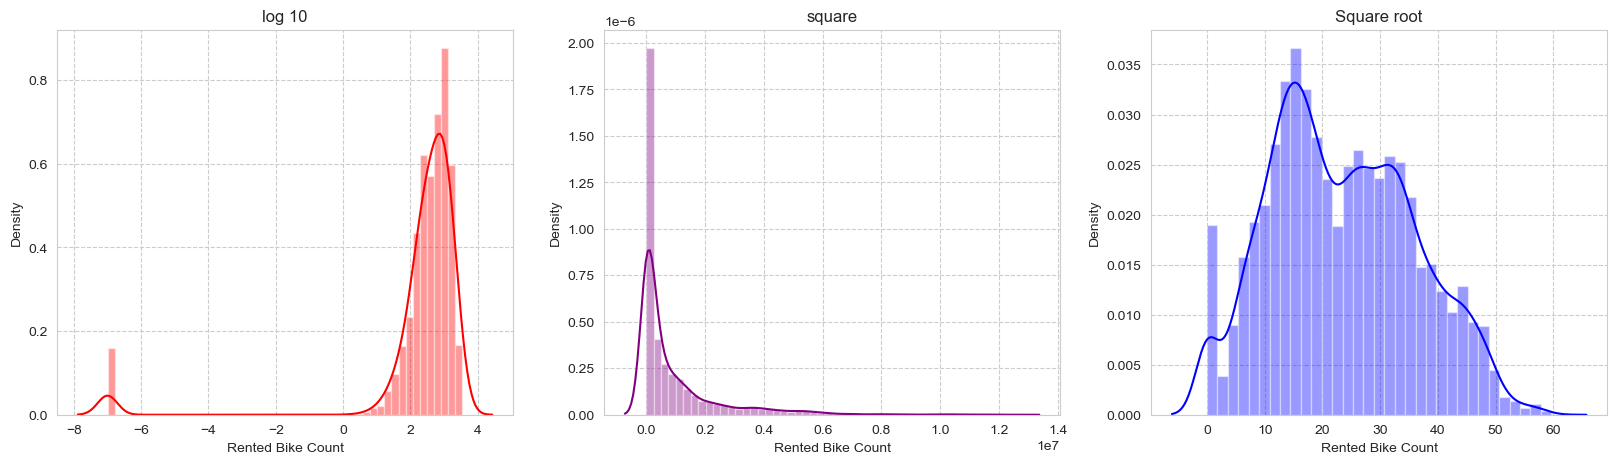

In [64]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(final_df_for_model['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((final_df_for_model['Rented Bike Count']**2),ax=axes[1],color='purple').set_title("square")
sns.distplot(np.sqrt(final_df_for_model['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")

#### We could infer here that data is somewhat normally distributed using Square root transformation

In [65]:
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))

# Applying Power Transformation on data for independent variable

In [66]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Temperature(°C)'] = scaler.fit_transform(final_df_for_model[['Temperature(°C)']].values)

#### Yeo-Johnson is best to handle negative and positive data correctly so we have used this

In [67]:
final_df_for_model['Temperature(°C)']

0      -1.524530
1      -1.550880
2      -1.594831
3      -1.612422
4      -1.594831
          ...   
8755   -0.715933
8756   -0.783239
8757   -0.850700
8758   -0.892958
8759   -0.909884
Name: Temperature(°C), Length: 8760, dtype: float32

In [68]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Rainfall(mm)'] = scaler.fit_transform(final_df_for_model[['Rainfall(mm)']].values)

In [69]:
final_df_for_model['Rainfall(mm)']

0      -0.252858
1      -0.252858
2      -0.252858
3      -0.252858
4      -0.252858
          ...   
8755   -0.252858
8756   -0.252858
8757   -0.252858
8758   -0.252858
8759   -0.252858
Name: Rainfall(mm), Length: 8760, dtype: float32

In [70]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Snowfall (cm)'] = scaler.fit_transform(final_df_for_model[['Snowfall (cm)']].values)

In [71]:
final_df_for_model['Snowfall (cm)']

0      -0.230785
1      -0.230785
2      -0.230785
3      -0.230785
4      -0.230785
          ...   
8755   -0.230785
8756   -0.230785
8757   -0.230785
8758   -0.230785
8759   -0.230785
Name: Snowfall (cm), Length: 8760, dtype: float32

In [72]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Wind speed (m/s)'] = scaler.fit_transform(final_df_for_model[['Wind speed (m/s)']].values)

In [73]:
final_df_for_model['Wind speed (m/s)']

0       0.618172
1      -0.923634
2      -0.640260
3      -0.778156
4       0.700246
          ...   
8755    0.932090
8756    0.700246
8757   -1.801848
8758   -0.640260
8759   -0.265079
Name: Wind speed (m/s), Length: 8760, dtype: float32

In [74]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Rented Bike Count'] = scaler.fit_transform(final_df_for_model[['Rented Bike Count']].values)

In [75]:
final_df_for_model['Rented Bike Count']

0      -0.530004
1      -0.676497
2      -0.779424
3      -1.047379
4      -1.200315
          ...   
8755    0.695553
8756    0.403665
8757    0.307082
8758    0.332501
8759    0.141594
Name: Rented Bike Count, Length: 8760, dtype: float64

In [76]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Humidity(%)'] = scaler.fit_transform(final_df_for_model[['Humidity(%)']].values)

In [77]:
final_df_for_model['Humidity(%)']

0      -1.038829
1      -0.986482
2      -0.934363
3      -0.882465
4      -1.091410
          ...   
8755   -1.197308
8756   -1.038829
8757   -0.934363
8758   -0.830782
8759   -0.728037
Name: Humidity(%), Length: 8760, dtype: float64

In [78]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Visibility (10m)'] = scaler.fit_transform(final_df_for_model[['Visibility (10m)']].values)

In [79]:
final_df_for_model['Visibility (10m)']

0       0.978214
1       0.978214
2       0.978214
3       0.978214
4       0.978214
          ...   
8755    0.762392
8756    0.978214
8757    0.912535
8758    0.692237
8759    0.792629
Name: Visibility (10m), Length: 8760, dtype: float64

In [80]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Day'] = scaler.fit_transform(final_df_for_model[['Day']].values)

In [81]:
final_df_for_model['Day']

0      -1.891503
1      -1.891503
2      -1.891503
3      -1.891503
4      -1.891503
          ...   
8755    1.502539
8756    1.502539
8757    1.502539
8758    1.502539
8759    1.502539
Name: Day, Length: 8760, dtype: float64

In [82]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Year'] = scaler.fit_transform(final_df_for_model[['Year']].values)

In [83]:
final_df_for_model['Year']

0      -3.282407
1      -3.282407
2      -3.282407
3      -3.282407
4      -3.282407
          ...   
8755    0.304655
8756    0.304655
8757    0.304655
8758    0.304655
8759    0.304655
Name: Year, Length: 8760, dtype: float64

# Final Dataset using Power Transformation

In [84]:
final_df_for_model

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0             -0.530004        -1.524530    -1.038829          0.618172   
1             -0.676497        -1.550880    -0.986482         -0.923634   
2             -0.779424        -1.594831    -0.934363         -0.640260   
3             -1.047379        -1.612422    -0.882465         -0.778156   
4             -1.200315        -1.594831    -1.091410          0.700246   
...                 ...              ...          ...               ...   
8755           0.695553        -0.715933    -1.197308          0.932090   
8756           0.403665        -0.783239    -1.038829          0.700246   
8757           0.307082        -0.850700    -0.934363         -1.801848   
8758           0.332501        -0.892958    -0.830782         -0.640260   
8759           0.141594        -0.909884    -0.728037         -0.265079   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0             0.978214                      0.0     -0.252858      -0.230785   
1             0.978214                      0.0     -0.252858      -0.230785   
2             0.978214                      0.0     -0.252858      -0.230785   
3             0.978214                      0.0     -0.252858      -0.230785   
4             0.978214                      0.0     -0.252858      -0.230785   
...                ...                      ...           ...            ...   
8755          0.762392                      0.0     -0.252858      -0.230785   
8756          0.978214                      0.0     -0.252858      -0.230785   
8757          0.912535                      0.0     -0.252858      -0.230785   
8758          0.692237                      0.0     -0.252858      -0.230785   
8759          0.792629                      0.0     -0.252858      -0.230785   

           Day      Year  ...  Month_December  Month_February  Month_January  \
0    -1.891503 -3.282407  ...               1               0              0   
1    -1.891503 -3.282407  ...               1               0              0   
2    -1.891503 -3.282407  ...               1               0              0   
3    -1.891503 -3.282407  ...               1               0              0   
4    -1.891503 -3.282407  ...               1               0              0   
...        ...       ...  ...             ...             ...            ...   
8755  1.502539  0.304655  ...               0               0              0   
8756  1.502539  0.304655  ...               0               0              0   
8757  1.502539  0.304655  ...               0               0              0   
8758  1.502539  0.304655  ...               0               0              0   
8759  1.502539  0.304655  ...               0               0              0   

      Month_July  Month_Jun  Month_March  Month_May  Month_November  \
0              0          0            0          0               0   
1              0          0            0          0               0   
2              0          0            0          0               0   
3              0          0            0          0               0   
4              0          0            0          0               0   
...          ...        ...          ...        ...             ...   
8755           0          0            0          0               1   
8756           0          0            0          0               1   
8757           0          0            0          0               1   
8758           0          0            0          0               1   
8759           0          0            0          0               1   

      Month_October  Month_September  
0                 0                0  
1                 0                0  
2                 0                0  
3                 0                0  
4                 0                0  
...             ...              ...  
8755              0                0  
8756              

# Divide data in dependent feature and Independent feature

In [85]:
X = final_df_for_model.drop(columns='Rented Bike Count')
y = final_df_for_model['Rented Bike Count']

In [86]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Solar Radiation (MJ/m2)'] = scaler.fit_transform(final_df_for_model[['Solar Radiation (MJ/m2)']].values)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Geeting Feel of my X_train, X_test, y_train, y_test

In [89]:
X_train.head(4)

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
8415         0.034936     0.165211          1.751037         -1.239600   
5049         0.837071     1.336007          0.164342         -1.467367   
8395        -0.131198    -0.575391         -0.150993         -1.031045   
1535        -1.296943     0.547351          0.445916         -0.113054   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)       Day  \
8415                     1.03     -0.252858      -0.230785  0.111232   
5049                     0.76     -0.252858      -0.230785  1.409907   
8395                     0.00     -0.252858      -0.230785  0.001728   
1535                     0.00     -0.252858      -0.230785 -1.708018   

          Year  Hour_Morning  ...  Month_December  Month_February  \
8415  0.304655             0  ...               0               0   
5049  0.304655             1  ...               0               0   
8395  0.304655             0  ...               0               0   
1535  0.304655             0  ...               0               1   

      Month_January  Month_July  Month_Jun  Month_March  Month_May  \
8415              0           0          0            0          0   
5049              0           0          1            0          0   
8395              0           0          0            0          0   
1535              0           0          0            0          0   

      Month_November  Month_October  Month_September  
8415               1              0                0  
5049               0              0                0  
8395               1              0                0  
1535               0              0                0  

[4 rows x 27 columns]

In [90]:
y_train.head(4)

8415    0.686562
5049    0.898640
8395    1.136093
1535   -0.762058
Name: Rented Bike Count, dtype: float64

In [91]:
X_test.head(4)

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
6056         1.191212     0.547351          0.261589          0.976155   
5556         1.634993    -0.324588          0.533461         -1.129058   
5990         1.749894    -0.374407         -0.384316          0.465697   
7674         0.341532    -0.524881         -0.150993          0.260537   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)       Day  \
6056                     0.70     -0.252858      -0.230785 -0.577677   
5556                     3.21     -0.252858      -0.230785  0.532990   
5990                     1.68     -0.252858      -0.230785 -0.960019   
7674                     0.11     -0.252858      -0.230785  0.111232   

          Year  Hour_Morning  ...  Month_December  Month_February  \
6056  0.304655             1  ...               0               0   
5556  0.304655             1  ...               0               0   
5990  0.304655             0  ...               0               0   
7674  0.304655             0  ...               0               0   

      Month_January  Month_July  Month_Jun  Month_March  Month_May  \
6056              0           0          0            0          0   
5556              0           1          0            0          0   
5990              0           0          0            0          0   
7674              0           0          0            0          0   

      Month_November  Month_October  Month_September  
6056               0              0                0  
5556               0              0                0  
5990               0              0                0  
7674               0              1                0  

[4 rows x 27 columns]

In [92]:
y_test.head(4)

6056    1.369246
5556    0.479421
5990    0.254929
7674    2.035583
Name: Rented Bike Count, dtype: float64

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 27), (1752, 27), (7008,), (1752,))

# Creating a function for calculate score

In [94]:
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))

# Model 1 - Linear Regression

In [95]:
# Fitting the model
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [96]:
regression.score(X_train,y_train)

0.7229002977766601

In [97]:
reg_pred = regression.predict(X_test)

In [98]:
score_metrics(y_test,reg_pred)

mean absolute error is  : 0.6118582368970518
mean squared error is  : 0.9825620119707738
Root mean squared error is  : 0.9912426604877203
R2 score is  : 0.2975340590997768


In [99]:
 regression.coef_

array([ 4.79030345e-01, -1.61192052e-01,  3.12613280e-02,  2.93320590e-02,
       -1.05550023e-03, -2.56862096e-01,  1.20878103e-02, -2.43920810e-03,
       -8.36605427e-03, -3.33260056e-01,  2.30711055e-01, -7.19684384e-02,
       -9.80174732e-02, -3.15279777e-01,  2.63282275e-01,  2.71303976e+00,
       -2.87884945e-01,  2.33228647e-03, -1.95787116e-01, -1.21824947e-01,
       -1.09917189e-01,  2.99784661e-01, -1.28093055e-01,  1.50702343e-01,
        1.66627125e-01,  2.70795213e-01,  4.78433508e-02])

In [100]:
regression.intercept_

-2.6295222414421926

# Model - 2 Pipeline for Polynomial Features

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe_PF = Pipeline((
("poly",PolynomialFeatures(degree=2)),
("lr", LinearRegression()),
))
pipe_PF.fit(X_train,y_train)
print("Training R2")
print(pipe_PF.score(X_train,y_train))
print("Testing R2")
print(pipe_PF.score(X_test,y_test))

Training R2
0.8196612181431999
Testing R2
0.7854238684583543


# Model - 3 Using Regularization Methods

## Lasso

In [102]:
L1 = Lasso(alpha=0.001, max_iter=1000)
L1.fit(X_train,y_train)
L1.score(X_train,y_train)

0.7226745826949159

In [103]:
L1_pred = L1.predict(X_test)
score_metrics(y_test,L1_pred)

mean absolute error is  : 0.6110446212855665
mean squared error is  : 0.9716787155134632
Root mean squared error is  : 0.9857376504493796
R2 score is  : 0.3053148861548006


In [104]:
L1.coef_

array([ 4.75593541e-01, -1.59098524e-01,  2.89729309e-02,  2.95740839e-02,
        0.00000000e+00, -2.56295952e-01,  1.04461069e-02, -4.54199158e-04,
       -4.01103431e-02, -3.36003473e-01,  2.23298282e-01, -7.75428174e-04,
       -0.00000000e+00, -3.75954072e-01,  2.39451233e-01,  2.66840074e+00,
       -3.11896091e-01,  0.00000000e+00, -6.64322815e-02, -0.00000000e+00,
       -1.34152276e-01,  2.50705469e-01, -1.29957740e-01,  1.25174878e-01,
        2.08330516e-01,  3.12049964e-01,  8.82895332e-02])

In [105]:
L1.intercept_

-2.6088306983343967

# Cross Validation

In [106]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [107]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -0.280742201526956


In [108]:
lasso_pred = lasso_regressor.predict(X_test)
score_metrics(y_test,lasso_pred)

mean absolute error is  : 0.6117972075377461
mean squared error is  : 0.9814934577860951
Root mean squared error is  : 0.9907035165911622
R2 score is  : 0.29829800367691106


# Ridge

In [109]:
L2 = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
L2_regressor = GridSearchCV(L2, parameters, scoring='neg_mean_squared_error', cv=5)
L2_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [110]:
print("The best fit alpha value is found out to be :" ,L2_regressor.best_params_)
print("\nUsing ",L2_regressor.best_params_, " the negative mean squared error is: ", L2_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.2807461881260833


In [111]:
L2_pred = L2_regressor.predict(X_test)
score_metrics(y_test,L2_pred)

mean absolute error is  : 0.6113121017474895
mean squared error is  : 0.9778877922100807
Root mean squared error is  : 0.9888820921677572
R2 score is  : 0.3008758127419555


# Model - 4 GradientBoosting Regressor

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
pipe = Pipeline((
("sc",StandardScaler()),
("lr", GradientBoostingRegressor()),
))
pipe.fit(X_train,y_train)
print("Training R2")
print(pipe.score(X_train,y_train))
print("Testing R2")
print(pipe.score(X_test,y_test))

Training R2
0.8424185620498498
Testing R2
0.8276128928697316


# Model 5 Support Vector Regressor

In [113]:
from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [114]:
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = regressor.predict(X_test)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.2884691605615402


In [115]:
from sklearn.metrics import r2_score

# Predict the target variable for the test data
y_pred = regressor.predict(X_test)




In [116]:
# Calculate the R2 score, which is a measure of the accuracy of the model
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("R2 Score:", r2)

R2 Score: 0.7077928653124378


In [117]:
pipe_SVR = Pipeline((
("sc",StandardScaler()),
("lr", SVR()),
))
pipe.fit(X_train,y_train)
print("Training R2")
print(pipe.score(X_train,y_train))
print("Testing R2")
print(pipe.score(X_test,y_test))

Training R2
0.8424185620498498
Testing R2
0.8276128928697316


# Model 6 - Random Forest Regressor

In [118]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor
random = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
random.fit(X, y)

# Predict the target variable for new data
y_pred = random.predict(X_test)


In [119]:
pipe_RFR = Pipeline((
("lr", RandomForestRegressor()),
))
pipe_RFR.fit(X_train,y_train)
print("Training R2")
print(pipe_RFR.score(X_train,y_train))
print("Testing R2")
print(pipe_RFR.score(X_test,y_test))

Training R2
0.9810306110860386
Testing R2
0.8589364583830383


# Conclusion

1. in Afternoon and Night there were more vehicle rented so for our business perspective we could focus more on morning time for increase supply
2. during all morning, afternoon and Night bike rent count is more in Summer Season only so we could predict that customer might be not use bike due to rain and during winter excess cool whether why i am predicting this because as we seen " As the temperature increases bike rent count increases in plot".
3. Bike Rent count is more when no holiday is there so we can say that people uses bike for transportation to go for offices and other works.
4. As we seen here that in 2017 bike rent count is less and in 2018 count is increase drastically why because due to starting of services people might not know about this much so they used less but when people start using this service count is gone more in 2018 so we could expect that in upcomming year count would further increase as people will use service more and more.
5. Here we clearly seen trend that first month count is increasing in everymonth till summer and after that count is further start decilining it may be because of rainy season people prefer less bike rent services.
6. Final comment are that " There is a scope of improvement further as we need more data in future and we could capture information of customers who have used this services and we could also capture their occupation so we could predict more accurately".